## Reference

- [SeparableConv2D](https://www.icode9.com/content-4-93052.html)
- [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)


## Normal Convolution
- one filter(kernel) for every chanels
- filter numbers = output feature map numbers
- `kernel parameters = (3x3x3+1)x4 = 112  (kernel + bias) * kernel_numbers = all_layer_parameters`
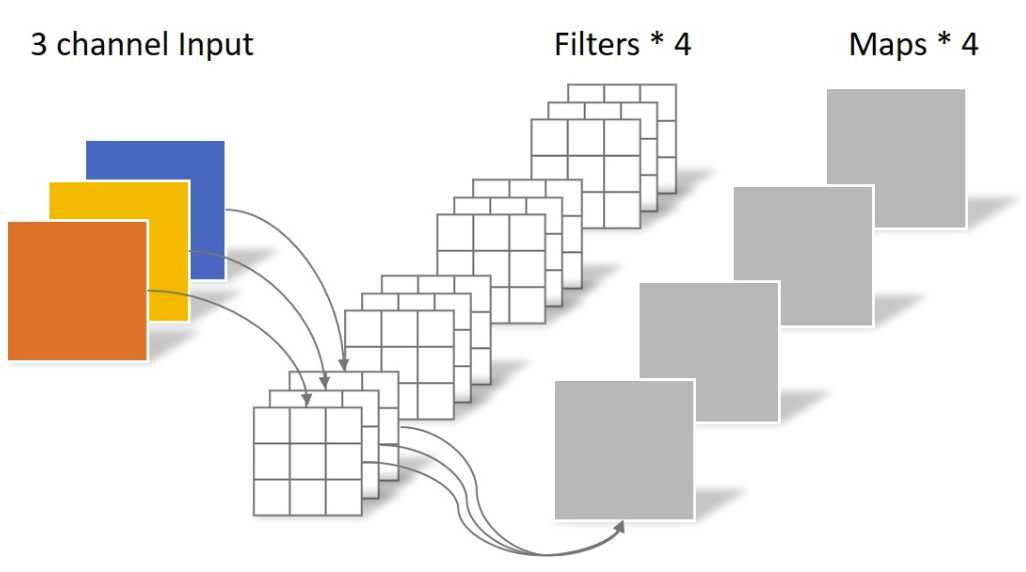

# Separable Convolution
### Step1. DepthWise Convolution
- one input channel mapping one filter(kernel)
- *`input channel number equals filter number and equals output feature map number`*
- DepthWise parameters: (3x3x1+0)x3 = 27
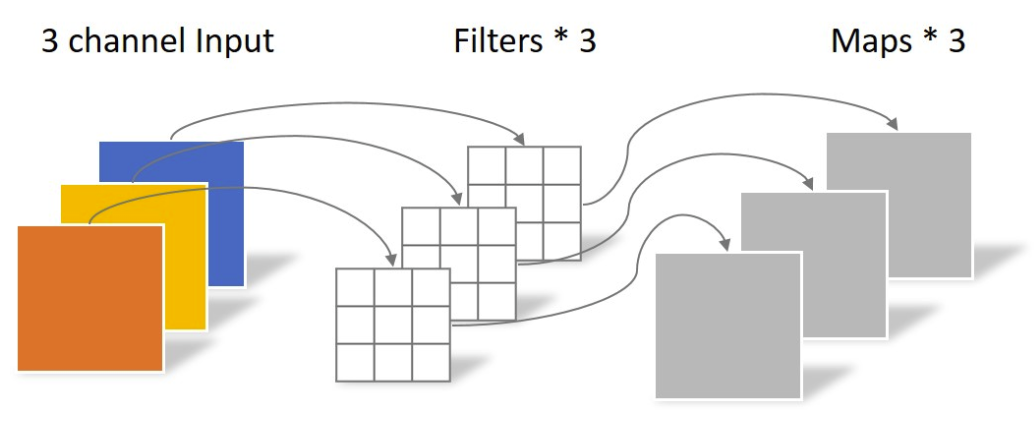

### step2. PointWise Convolution
- PointWise parameters: (1x1x3+1)x4 = 16
- Total_SeparableConv_params: DepthWise + PointWise = 27 + 16 = 43
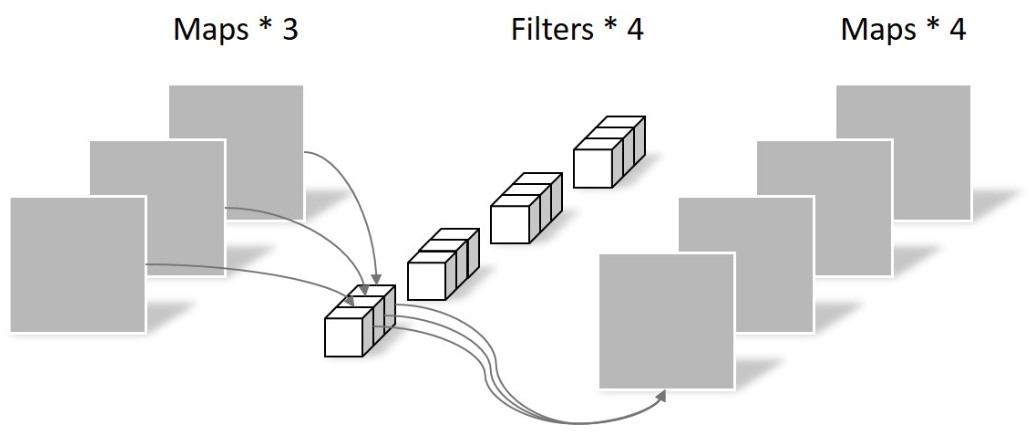

In [8]:
from keras.layers import Conv2D, SeparableConv2D, Input
from keras.models import Model
import keras

## Normal Convolution Parameters

In [9]:
keras.backend.clear_session()
input_layer = Input((224, 224, 3))
feature_map_1 = Conv2D(filters=32, kernel_size=(3, 3))(input_layer)
feature_map_2 = Conv2D(filters=64, kernel_size=(3, 3))(feature_map_1)
model = Model(inputs=[input_layer], outputs=[feature_map_2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [10]:
#parameter calculation: (kernel_size * chanel_size(depth_multiplier) + bias) * kernel_numbers
first_layer_params = (3*3*3+1)*32
second_layer_params = (3*3*32+1)*64
print('1st_layer_params:', first_layer_params)
print('2nd_layer_parmas:', second_layer_params)
print('total_params:', first_layer_params+second_layer_params)

1st_layer_params: 896
2nd_layer_parmas: 18496
total_params: 19392


## Separable Convolution parameters

In [11]:
keras.backend.clear_session()
input_layer = Input((224, 224, 3))
feature_map_1 = SeparableConv2D(filters=32, kernel_size=(3, 3))(input_layer)
feature_map_2 = SeparableConv2D(filters=64, kernel_size=(3, 3))(feature_map_1)
model = Model(inputs=[input_layer], outputs=[feature_map_2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 222, 222, 32)      155       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 220, 220, 64)      2400      
Total params: 2,555
Trainable params: 2,555
Non-trainable params: 0
_________________________________________________________________


In [12]:
#parameter calculation: (kernel_size * chanel_size(depth_multiplier) + bias) * kernel_numbers
depthwise_layer_params = (3*3*1+0)*3 #no bias in depthwise conv
pointwise_layer_params = (1*1*3+1)*32
print('1st_depthwise_layer_params:', depthwise_layer_params)
print('1st_pointwise_layer_params:', pointwise_layer_params)
print('1st_SeparableConv_params:', depthwise_layer_params+pointwise_layer_params)
depthwise_layer_params_2 = (3*3*1+0)*32
pointwise_layer_params_2 = (1*1*32+1)*64
print('2nd_depthwise_layer_params:', depthwise_layer_params_2)
print('2nd_pointwise_layer_params:', pointwise_layer_params_2)
print('2nd_SeparableConv_params:', depthwise_layer_params_2+pointwise_layer_params_2)
print('total_params:', depthwise_layer_params+pointwise_layer_params+depthwise_layer_params_2+pointwise_layer_params_2)

1st_depthwise_layer_params: 27
1st_pointwise_layer_params: 128
1st_SeparableConv_params: 155
2nd_depthwise_layer_params: 288
2nd_pointwise_layer_params: 2112
2nd_SeparableConv_params: 2400
total_params: 2555


# Keras tutorial (MNIST)
## Make sure you understand each code meaning.
1. Does input data be normalized ? If does, which line?  
   `Yes. @line36/37 normalized data by dividing 255`
2. What is the optimizer?  
   `keras.optimizers.Adadelta() @line59`
3. How many Convolution layers in this MNIST tutorial?  
   `2 convolution layers. @line47-50`  
   `model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))`  
   `model.add(Conv2D(64, (3, 3), activation='relu'))`  
4. What is the total parameters ?  
   `total_parameters:1,199,882`

In [13]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.2628 - acc: 0.9185 - val_loss: 0.0576 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0865 - acc: 0.9744 - val_loss: 0.0525 - val_acc: 0.9825
Epoch 3/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0336 - val_acc: 0.9883
Epoch 4/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0548 - acc: 0.9833 - val_loss: 0.0377 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0314 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0326 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================]

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________